# Lecture 1: Exploratory Data Analysis (EDA)

The goal of this assignment is to help you familiarize yourself with the Steam dataset, which you will be using throughout the project. This dataset consists of six files:

- bundles.csv: Contains information on Steam Bundles (e.g., games sold together).
- games.csv: Includes basic information on games (e.g., publisher, genre, price).
- extended_games.csv: Provides in-depth information on games (e.g., platform, average playtime).
- interactions.csv: Captures which games are included in a user's library (which is what we're going to try to predict).
- item_reviews.csv: Groups reviews by game.
- user_reviews.csv: Groups reviews by user.

Throughout this Jupyter Notebook, any code that requires your input or completion will be clearly marked with a **Task** and a [TODO] tag. Your job is to fill in these sections with the appropriate code, following the instructions and hints provided to guide you through each step.

## Assignment Instructions:

For each of the focus areas we discussed in the lecture (e.g., data integrity, distributions, relationships, missing data), you are required to perform at least three exploratory operations that help you verify the quality of the data or understand the structure and patterns in the dataset.

For each operation, write a brief explanation (1-2 sentences) describing what you are trying to achieve. For example, you might explain that you're "checking for missing values in the price column of the games dataset" or "examining the distribution of game prices."

At the end of your Notebook, summarize three to five key insights you gained from your analysis. These insights should highlight important characteristics, challenges, or opportunities in the dataset (e.g., missing data, interesting patterns, potential biases).


## Deliverables:

Please upload the final version of this notebook to the GitHub Classroom repository.

Let’s begin by importing the necessary libraries:

In [53]:
# https://pandas.pydata.org/ - pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
import pandas as pd
# https://seaborn.pydata.org/ - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
# https://numpy.org/ - The fundamental package for scientific computing with Python
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!unzip cleaned_datasets_students.zip

Archive:  cleaned_datasets_students.zip
  inflating: bundles.csv             
  inflating: extended_games.csv      
  inflating: games.csv               
  inflating: item_reviews.csv        
  inflating: test_interactions_in.csv  
  inflating: train_interactions.csv  
  inflating: user_reviews.csv        


Loading data:

In [74]:
games = pd.read_csv(f"games.csv")
bundles = pd.read_csv(f"bundles.csv")

# Please load all of the files you will use in your EDA

In [90]:
extended_games = pd.read_csv(f"extended_games.csv")

## Task 1: Data Structure
For each operation, write a brief explanation (1-2 sentences) describing what you are trying to achieve. For example, you might explain that you're "checking for missing values in the price column of the games dataset" or "examining the distribution of game prices."

Try to answer some of these questions about the structure of the dataset:
- What types of variables are present in the dataset?
  - For example, are the variables numerical, categorical, text, dates?
- Are there any duplicated records or irrelevant features in the dataset?
- Do the data types align with the content (intuitively)?
  - For example, are numerical columns actually numbers and categorical columns properly coded?


### Explanation 1: [TODO]

In [35]:
games.head()
# checking initially the collumns of the games table for a better overview of the info. There are numerical, categorical and text

,item_id,item_name,publisher,genres,url,tags,sentiment,metascore,specs,price,release_date
0,0,Counter-Strike,Valve,['Action'],http://store.steampowered.com/app/10/CounterSt...,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",Overwhelmingly Positive,88.0,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,2000-11-01
1,1,Rag Doll Kung Fu,Mark Healey,['Indie'],http://store.steampowered.com/app/1002/Rag_Dol...,"['Indie', 'Fighting', 'Multiplayer']",Mixed,69.0,"['Single-player', 'Multi-player']",9.99,2005-10-12
2,2,Silo 2,Nevercenter Ltd. Co.,['Animation &amp; Modeling'],http://store.steampowered.com/app/100400/Silo_2/,"['Animation & Modeling', 'Software']",Mostly Positive,NaN,NaN,99.99,2012-12-19
3,3,Call of Duty: World at War,Activision,['Action'],http://store.steampowered.com/app/10090/Call_o...,"['Zombies', 'World War II', 'FPS', 'Action', '...",Very Positive,83.0,"['Single-player', 'Multi-player', 'Co-op']",19.99,2008-11-18
4,4,3D-Coat V4.8,Pilgway,['Animation &amp; Modeling'],http://store.steampowered.com/app/100980/3DCoa...,['Animation & Modeling'],Very Positive,NaN,['Steam Cloud'],99.99,2012-10-02


In [36]:
# getting some basic info like data types, non-null values.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       8523 non-null   int64  
 1   item_name     8523 non-null   object 
 2   publisher     8004 non-null   object 
 3   genres        8104 non-null   object 
 4   url           8523 non-null   object 
 5   tags          8519 non-null   object 
 6   sentiment     8492 non-null   object 
 7   metascore     2117 non-null   float64
 8   specs         8386 non-null   object 
 9   price         8373 non-null   object 
 10  release_date  8188 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 732.6+ KB


as can be seen a lot of games don't have a metascore

In [37]:
# next will check the statistic, usefull for spotting outliers, unexpected value range or any formatting issue
games.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_id,8523.0,NaN,NaN,NaN,4261.0,2460.522505,0.0,2130.5,4261.0,6391.5,8522.0
item_name,8523,8520,New York Bus Simulator,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publisher,8004,3816,Strategy First,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,8104,576,"['Action', 'Indie']",665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,8523,8523,http://store.steampowered.com/app/99910/Puzzle...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tags,8519,7545,"['Action', 'Indie']",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentiment,8492,18,Very Positive,2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metascore,2117.0,NaN,NaN,NaN,71.98205,10.973101,20.0,66.0,73.0,80.0,96.0
specs,8386,1804,['Single-player'],1217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,8373,96,9.99,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# we also want to know if there any duplicates in the records
games.duplicated().sum()

np.int64(0)

In [39]:
# also important is checking how many values we have.
games.isnull().sum()

,0
item_id,0
item_name,0
publisher,519
genres,419
url,0
tags,4
sentiment,31
metascore,6406
specs,137
price,150


In [41]:
# initial check of the collumn and exploring the data avialable
bundles.head()

,bundle_id,item_id,bundle_final_price,bundle_url,bundle_price,bundle_name,bundle_discount,genre,discounted_price,item_url,item_name
0,0,NaN,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,10%,"Adventure, Indie, RPG",$8.99,http://store.steampowered.com/app/326950,Sword of Asumi
1,0,NaN,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,10%,"Adventure, Indie, RPG",$2.99,http://store.steampowered.com/app/331490,Sword of Asumi - Soundtrack
2,0,NaN,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,10%,"Adventure, Indie, RPG",$1.99,http://store.steampowered.com/app/331491,Sword of Asumi - Graphic Novel
3,0,NaN,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,10%,"Adventure, Indie, RPG",$0.99,http://store.steampowered.com/app/331492,Sword of Asumi - Character Creator
4,0,4146.0,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,10%,"Adventure, Casual, Indie",$12.99,http://store.steampowered.com/app/348540,Divine Slice of Life


In [43]:
# I then want to check the basic info like with the games
bundles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bundle_id           3552 non-null   int64  
 1   item_id             1626 non-null   float64
 2   bundle_final_price  3552 non-null   object 
 3   bundle_url          3552 non-null   object 
 4   bundle_price        3552 non-null   object 
 5   bundle_name         3552 non-null   object 
 6   bundle_discount     3552 non-null   object 
 7   genre               3206 non-null   object 
 8   discounted_price    3552 non-null   object 
 9   item_url            3552 non-null   object 
 10  item_name           3552 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 305.4+ KB


In [42]:
# let's see how many missing value there are
bundles.isnull().sum()

,0
bundle_id,0
item_id,1926
bundle_final_price,0
bundle_url,0
bundle_price,0
bundle_name,0
bundle_discount,0
genre,346
discounted_price,0
item_url,0


In [51]:
# let's check the url on steam to see what a bundle is, cause i don't understand the item id in this context
print(bundles['item_url'].head(10))

0    http://store.steampowered.com/app/326950
1    http://store.steampowered.com/app/331490
2    http://store.steampowered.com/app/331491
3    http://store.steampowered.com/app/331492
4    http://store.steampowered.com/app/348540
5    http://store.steampowered.com/app/352010
6    http://store.steampowered.com/app/390470
7    http://store.steampowered.com/app/394050
8    http://store.steampowered.com/app/398100
9    http://store.steampowered.com/app/408770
Name: item_url, dtype: object


In [52]:
print(bundles['bundle_url'].head(10))

0    http://store.steampowered.com/bundle/450/?utm_...
1    http://store.steampowered.com/bundle/450/?utm_...
2    http://store.steampowered.com/bundle/450/?utm_...
3    http://store.steampowered.com/bundle/450/?utm_...
4    http://store.steampowered.com/bundle/450/?utm_...
5    http://store.steampowered.com/bundle/450/?utm_...
6    http://store.steampowered.com/bundle/450/?utm_...
7    http://store.steampowered.com/bundle/450/?utm_...
8    http://store.steampowered.com/bundle/450/?utm_...
9    http://store.steampowered.com/bundle/450/?utm_...
Name: bundle_url, dtype: object


## Task 2: Data Integrity

For each operation, write a brief explanation (1-2 sentences) describing what you are trying to achieve. For example, you might explain that you're "checking for missing values in the price column of the games dataset" or "examining the distribution of game prices."

Try to answer some of these questions about the integrity of the dataset:

- Are there any missing values in the data?
  - Where and why is data missing? Is it missing at random, or are there patterns that might indicate a deeper issue?
  - What methods could be used to handle missing data (e.g., imputation, deletion, interpolation, replace with a “missing feature”)?
  - Could missing data introduce bias into the analysis, and if so, how can it be mitigated?
- Are there any obvious errors?
    - For example, negative values where they shouldn't exist, inconsistent text labels, or outliers that seem incorrect?
- What anomalies are present in the data?
  - Are they valid observations or errors?
  - How should these outliers be treated? Should they be excluded, transformed, or investigated further?
- Are some columns related?
  - Do the values match up?
  - Are there mismatched values? (One-to-many/Many-to-one)
  - Does one have more missing values than the other?



### Explanation 1: [TODO]

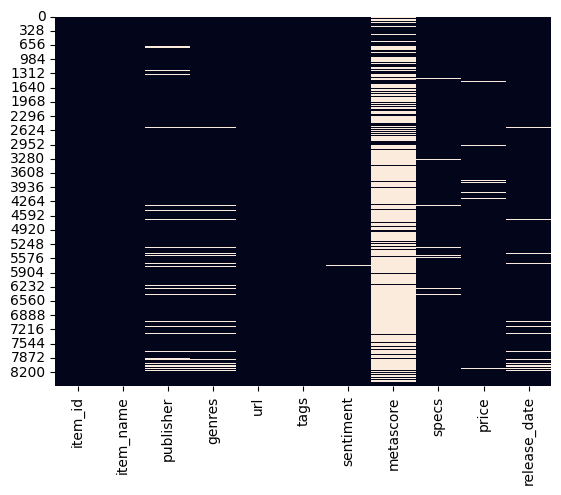

In [54]:
# we have already look for missing data, but we can also visualize it
sns.heatmap(games.isnull(), cbar=False)
plt.show()

In [58]:
# We can check if there is a relationship with the price missing and the publisher
games[games['price'].isnull()]['publisher'].value_counts().head()
# We see that 3D Realms have 7 that are missing a price (Maybe old games?)


,count
publisher,
3D Realms (Apogee Software),7
ISOTX,3
Rockstar Games,2
Ubisoft,2
Fast Forward Games,2


In [81]:
# Lets check for negative value in the price
# games[games['price'].astype(float) < 0] this line is on purpose commented out

# with the error from before we can see that some games are free to play. Let's check.
non_numeric_prices = games[~games['price'].astype(str).str.replace('.', '', 1).str.isdigit()]
non_numeric_prices['price'].unique()
# we can convert it to a 0
games['price'] = games['price'].replace(non_numeric_prices['price'].unique(), '0')
# Let's also convert the Nan value to 0
games['price'] = pd.to_numeric(games['price'], errors='coerce').fillna(0)
games['price'].head(40)

,price
0,9.99
1,9.99
2,99.99
3,19.99
4,99.99
5,19.99
6,19.99
7,9.99
8,19.99
9,9.99


### Explanation 2: [TODO]

In [82]:
# check the label consistency and see if there mal formed labels
games['genres'].unique()
# we can already see the '&amp'

array(["['Action']", "['Indie']", "['Animation &amp; Modeling']",
       "['Adventure']", "['Action', 'Casual']", "['Sports']",
       "['Action', 'Adventure']", "['Adventure', 'Indie', 'RPG']",
       "['Action', 'Indie', 'Strategy']", "['Simulation']",
       "['Action', 'RPG']", "['RPG', 'Strategy']",
       "['Action', 'Free to Play']", "['Action', 'Adventure', 'Indie']",
       "['Indie', 'Strategy']", "['Casual', 'Indie']",
       "['Adventure', 'Indie']", nan,
       "['Free to Play', 'Action', 'Strategy', 'Indie', 'Sports']",
       "['Action', 'Adventure', 'Indie', 'RPG']", "['Strategy']",
       "['Adventure', 'Casual', 'Indie']", "['Action', 'Indie']",
       "['Simulation', 'Strategy']", "['Action', 'Casual', 'Indie']",
       "['Action', 'Indie', 'RPG']",
       "['Action', 'Indie', 'RPG', 'Strategy']", "['RPG', 'Indie']",
       "['Indie', 'RPG']", "['Action', 'Simulation', 'Strategy']",
       "['Action', 'Indie', 'Casual']", "['RPG', 'Simulation']",
       "['Casual', '

## Task 3: Data Distributions and Summary Statistics

For each operation, write a brief explanation (1-2 sentences) describing what you are trying to achieve. For example, you might explain that you're "checking for missing values in the price column of the games dataset" or "examining the distribution of game prices."

Try to answer some of these questions about the distributions and summary statistics:

- What are the summary statistics of numerical columns?
    - For example, mean, median, mode, range, standard deviation)?
- Is the data skewed?
    - If so, in which direction (positively or negatively)?
    - Do the distributions of numerical variables show normality, or are they skewed, bimodal, or otherwise non-normal?
- Are there any extreme values (outliers)?
    - If so, how do they affect the distribution?
- How are the categorical variables distributed?
    - For example, what are the frequency counts?
    - Are there any categories with very few or too many observations?


### Explanation 1: [TODO]

In [86]:
# for the statistic we can use the describe again and then go from there to analyse and visualize better.
games.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,8523.0,4261.000000,2460.522505,0.0,2130.50,4261.00,6391.50,8522.00
metascore,2117.0,71.982050,10.973101,20.0,66.00,73.00,80.00,96.00
price,8523.0,9.735377,13.195944,0.0,3.99,7.99,11.99,771.71


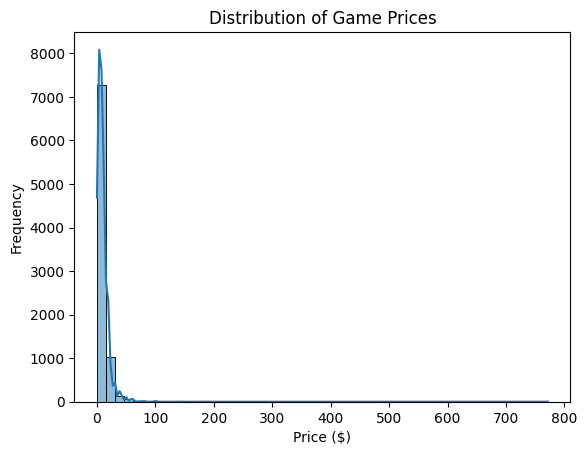

In [ ]:
# we want to visualize the distribution of the price to identify skewness
sns.histplot(games['price'], bins=50, kde=True)
plt.title("Distribution of games prices")
plt.xlabel("Price in $")
plt.ylabel("Frequency")
plt.show()

In [88]:
games['price'].skew()


np.float64(25.4798099788381)

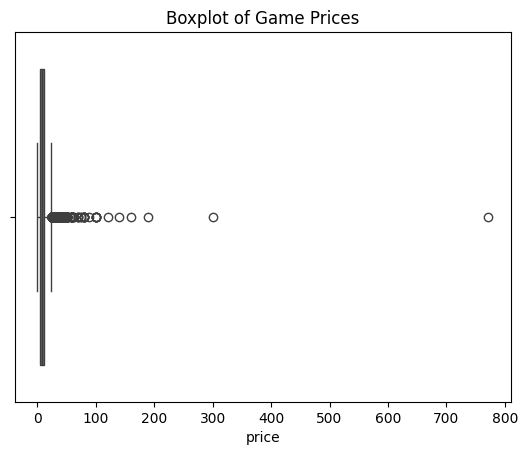

In [ ]:
# identify the outlier
sns.boxplot(x=games['price'])
plt.title("Boxplot of game prices")
plt.show()


In [ ]:
# explore the avarage playing time
extended_games.head(1)
# the next code is for google colab to see all the columns
pd.set_option('display.max_columns', None)
extended_games.head(1)

,item_id,item_name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags_Indie,tags_Casual,tags_Sports,tags_Bowling,tags_Action,tags_Pixel Graphics,tags_2D,tags_Retro,tags_Arcade,tags_Score Attack,tags_Minimalist,tags_Comedy,tags_Singleplayer,tags_Fast-Paced,tags_Funny,tags_Parody,tags_Difficult,tags_Gore,tags_Violent,tags_Western,tags_Controller,tags_Blood,tags,tags_2D Platformer,tags_Atmospheric,tags_Surreal,tags_Mystery,tags_Puzzle,tags_Survival,tags_Adventure,tags_Linear,tags_Experimental,tags_Platformer,tags_Precision Platformer,tags_Puzzle-Platformer,tags_Stylized,tags_Physics,tags_Time Manipulation,tags_Nudity,tags_Sexual Content,tags_Story Rich,tags_Turn-Based Combat,tags_Massively Multiplayer,tags_Multiplayer,tags_RPG,tags_Tactical RPG,tags_Exploration,tags_PvP,tags_MMORPG,tags_Turn-Based Strategy,tags_God Game,tags_Strategy,tags_2.5D,tags_Magic,tags_Medieval,tags_Mythology,tags_Class-Based,tags_Turn-Based Tactics,tags_Online Co-Op,tags_Co-op,tags_Tower Defense,tags_Rogue-lite,tags_RTS,tags_Replay Value,tags_Perma Death,tags_Isometric,tags_Rogue-like,tags_Dynamic Narration,tags_Real Time Tactics,tags_Abstract,tags_Tactical,tags_Sci-fi,tags_Simulation,tags_Classic,tags_Zombies,tags_Wargame,tags_Historical,tags_Strategy RPG,tags_Party-Based RPG,tags_Comic Book,tags_Team-Based,tags_Female Protagonist,tags_Hand-drawn,tags_World War II,tags_Card Game,tags_Deckbuilding,tags_Lovecraftian,tags_Board Game,tags_Free to Play,tags_Action Roguelike,tags_RPGMaker,tags_Fantasy,tags_Dungeon Crawler,tags_Early Access,tags_Top-Down,tags_Top-Down Shooter,tags_Procedural Generation,tags_Shooter,tags_Aliens,tags_Third Person,tags_Twin Stick Shooter,tags_Horror,tags_Hunting,tags_Level Editor,tags_3D,tags_First-Person,tags_Inventory Management,tags_Point & Click,tags_Hidden Object,tags_Pirates,tags_Resource Management,tags_Short,tags_Colorful,tags_Clicker,tags_Open World,tags_Building,tags_PvE,tags_Crafting,tags_Turn-Based,tags_World War I,tags_Steampunk,tags_Alternate History,tags_Psychological Horror,tags_Flight,tags_VR,tags_Racing,tags_Realistic,tags_Education,tags_Jet,tags_3D Vision,tags_Relaxing,tags_America,tags_TrackIR,tags_Combat Racing,tags_Driving,tags_Automobile Sim,tags_Anime,tags_Moddable,tags_Cinematic,tags_1990's,tags_Old School,tags_Superhero,tags_Time Travel,tags_Family Friendly,tags_Cute,tags_Cartoony,tags_Space,tags_Cartoon,tags_Mod,tags_Time Management,tags_Emotional,tags_Romance,tags_Drama,tags_Utilities,tags_Software,tags_Management,tags_Satire,tags_Walking Simulator,tags_Post-apocalyptic,tags_Local Multiplayer,tags_Dark Fantasy,tags_Dark Comedy,tags_Cats,tags_Great Soundtrack,tags_Beautiful,tags_Fighting,tags_2D Fighter,tags_Mature,tags_Beat 'em up,tags_Local Co-Op,tags_Mechs,tags_FPS,tags_Futuristic,tags_Robots,tags_Cyberpunk,tags_Dystopian,tags_Destruction,tags_Mars,tags_VR Only,tags_Action-Adventure,tags_Choices Matter,tags_Choose Your Own Adventure,tags_Dark Humor,tags_Gambling,tags_City Builder,tags_Kickstarter,tags_Character Customization,tags_Solitaire,tags_Hentai,tags_Visual Novel,tags_Dating Sim,tags_Stealth,tags_Match 3,tags_Tabletop,tags_Loot,tags_Souls-like,tags_Detective,tags_Investigation,tags_Dark,tags_Interactive Fiction,tags_Dinosaurs,tags_Life Sim,tags_Conversation,tags_Demons,tags_Action RPG,tags_Combat,tags_Co-op Campaign,tags_Social Deduction,tags_Hacking,tags_Character Action Game,tags_3D Platformer,tags_Archery,tags_Card Battler,tags_Logic,tags_Grid-Based Movement,tags_Escape Room,tags_Hack and Slash,tags_Swordplay,tags_Spectacle fighter,tags_Noi

In [100]:
# there are a lot of columns with tag, let's remove them
for col in extended_games.columns:
    if 'tag' in col:
        extended_games.drop(col, axis=1, inplace=True)

extended_games.head(1)

,item_id,item_name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu
0,0,Counter-Strike,"Nov 1, 2000",0,9.99,0,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,http://steamcommunity.com/app/10,NaN,True,True,True,88,https://www.metacritic.com/game/pc/counter-str...,0,122770,Includes intense violence and blood.,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...","[{'title': 'Buy Counter-Strike', 'description'...",['Valve'],['Valve'],"['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],['https://cdn.akamai.steamstatic.com/steam/app...,[],0,NaN,198387,5135,10000000 - 20000000,10524,1733,228,733,13230


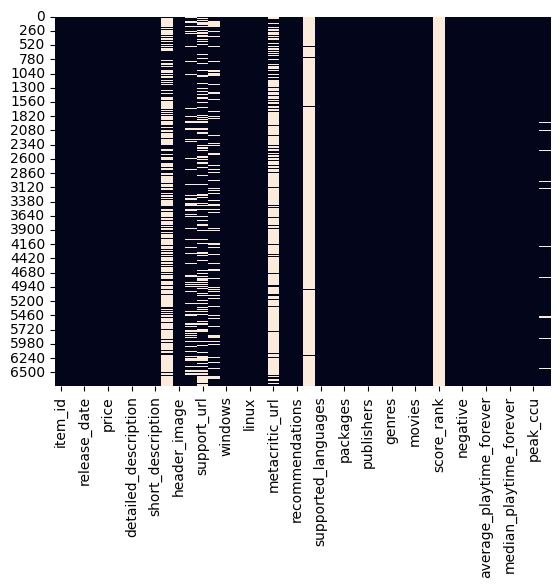

In [121]:
# we also want to visualize the missing value in the extended games
sns.heatmap(extended_games.isnull(), cbar=False)
plt.show()

In [122]:
# appearantly we can remove the collumn score_rank
extended_games['score_rank']

,score_rank
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6748,NaN
6749,NaN
6750,NaN
6751,NaN


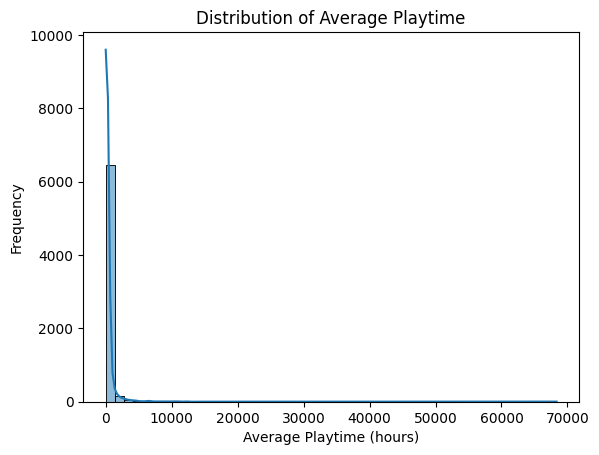

In [ ]:
# explore the avarage playing time to detect unusual high playing time (maybe a multiplayer game ?)
extended_games.head(10)

sns.histplot(extended_games['average_playtime_forever'], bins=50, kde=True)
plt.title("Average Playtime")
plt.xlabel("AP in hours")
plt.ylabel("Frequency")
plt.show()


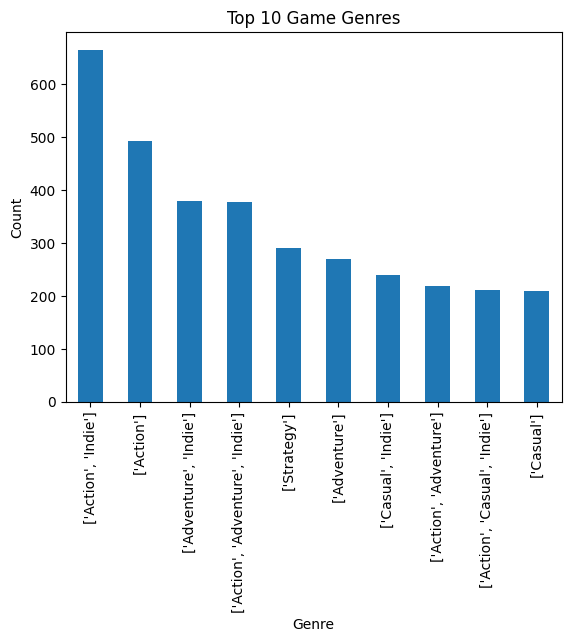

In [104]:
# Let's check the genre distribution to see the top genre
games['genres'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10")
plt.xlabel("genre")
plt.ylabel("count")
plt.show()


In [105]:
# Next let's see who are the biggest publisher on steam
games['publisher'].value_counts().head(10)


,count
publisher,
Strategy First,110
Ubisoft,96
THQ Nordic,82
KISS ltd,81
Square Enix,72
1C Company,62
Degica,53
SEGA,51
Paradox Interactive,51


## Task 4
For each operation, write a brief explanation (1-2 sentences) describing what you are trying to achieve. For example, you might explain that you're "checking for missing values in the price column of the games dataset" or "examining the distribution of game prices."

Try to answer some of these questions about relationships, feature engineering or assumptions:

### Data Relationships and Correlations

- Are there any obvious relationships between different variables?
    - For example, through scatter plots or correlation matrices?
- Do certain variables seem to cluster or group together?
    - What might this indicate about their relationships?
- How do categorical variables relate to numerical variables (e.g., box plots or groupwise summary statistics)?
- Are there any highly correlated features that could cause problems in modeling?

### Feature Engineering Potential

- Are there opportunities to create new features that might enhance the analysis (e.g., ratios, aggregates, transformations)?
- Are there features that could be removed due to redundancy or lack of variation?

### Assumptions about the Data

- How does the data match your expectations or domain knowledge? Are there any unexpected results that might require further investigation?



### Explanation 1: [TODO]

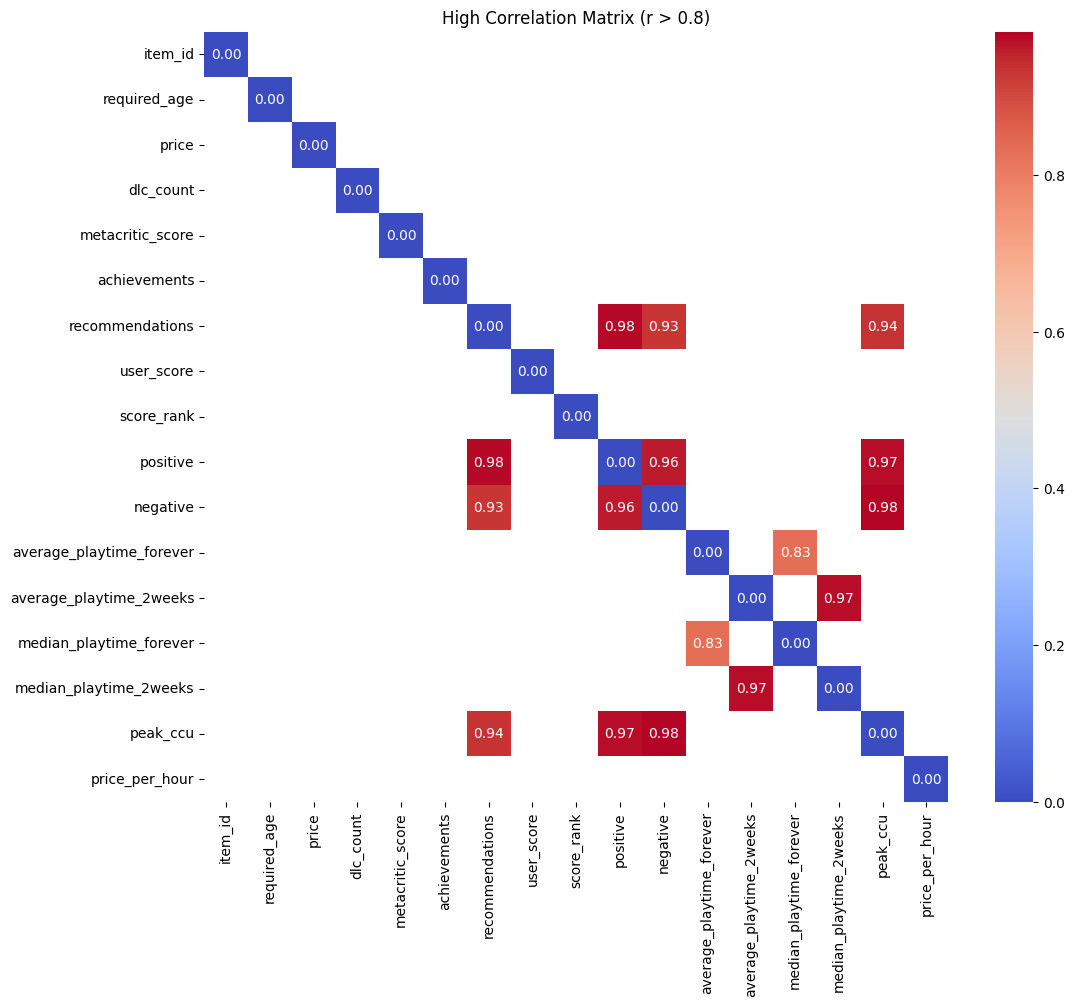

In [120]:
# To identify correlation between the various collumns, we can build the correlation matrix
# first select only the numerical data
numeric_cols = extended_games.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()

# We will use 80% as treshhold
high_corr = corr_matrix[corr_matrix > 0.8]

# set diagonal to 0
np.fill_diagonal(high_corr.values, 0)

# Plot heatmap of only high correlations
plt.figure(figsize=(12,10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("corr Matrix with 0,8 threshold")
plt.show()

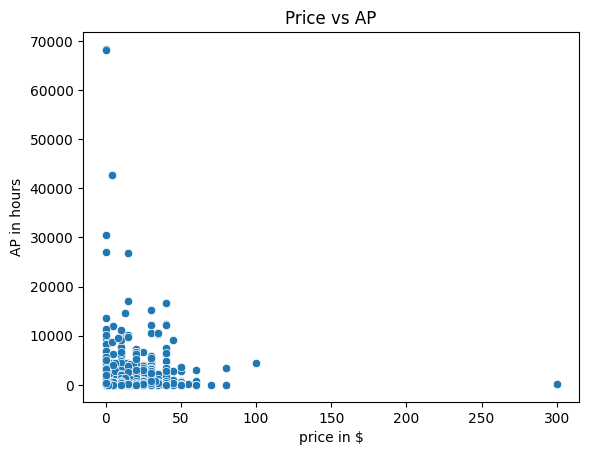

In [112]:
# Let's see if higher playing time translate to higher prices
sns.scatterplot(x='price', y='average_playtime_forever', data=extended_games)
plt.title("Price vs AP")
plt.xlabel("price in $")
plt.ylabel("AP in hours")
plt.show()

In [118]:
# create a new feature of price per hour, to reveal cheap games with long playing hours
extended_games['price_per_hour'] = extended_games['price'] / (extended_games['average_playtime_forever'])

extended_games['price_per_hour'].head(10)


,price_per_hour
0,0.000949
1,0.066000
2,inf
3,0.007815
4,0.138750
5,inf
6,0.499500
7,inf
8,inf
9,0.026783


# Task 5: Core Insights
Summarize three to five key insights you gained from your analysis. These insights should highlight important characteristics, challenges, or opportunities in the dataset (e.g., missing data, interesting patterns, potential biases).

1. There are many free games, that might be a potential bias in the review.
2. There are also many inexpensive games with high avarage playing, might be interting to identify those.
3. There are redundant collumns that can be removed because either not usefull in analysis (url) or too many missing values (score_rank in extended games)
4. Games with high average playing time can also be identify as multiplayer games, which I hypothesize are popular.
5.

## Congratulations! You’ve completed the assignment.